In [160]:
from xmltodict import parse
from urllib.request import urlopen
from datetime import *
from zipfile import ZipFile
from io import BytesIO

import  matplotlib.pyplot as plt

import pandas as pd
import json
import requests
import wbgapi as wb
import scipy.stats as stats
import numpy as np
import urllib
from collections import Counter, OrderedDict

# QUESTION 1

In [77]:
df = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')

In [78]:
df

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


In [79]:
df.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

In [80]:
def get_game_id(df, game_id):
    res = df[df['GAME_ID'] == game_id]
    return res

In [81]:
get_game_id(df, 21800794)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,444,1,9,636,21800794,SUNS Timeout: Regular (Full 7 Short 0),NaN,0:21,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:18 PM
445,445,0,8,637,21800794,SUB: Crawford FOR Holmes,NaN,0:21,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:18 PM
446,446,1,2,639,21800794,MISS Bridges 3PT Jump Shot,NaN,0:17,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:20 PM
447,447,0,4,640,21800794,NaN,NaN,0:14,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faried REBOUND (Off:7 Def:7),11:20 PM


In [82]:
get_game_id(df, 21800800)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
19922,0,0,12,2,21800800,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19923,1,0,10,4,21800800,Jump Ball Embiid vs. Ibaka: Tip to Muscala,NaN,12:00,1,4.0,...,203488,Mike Muscala,PHI,Philadelphia,1.610613e+09,76ers,NaN,NaN,NaN,8:17 PM
19924,2,1,2,7,21800800,MISS Butler 20' Jump Shot,NaN,11:44,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19925,3,0,4,8,21800800,Embiid REBOUND (Off:1 Def:0),NaN,11:42,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:17 PM
19926,4,72,1,9,21800800,Embiid 1' Putback Layup (2 PTS),NaN,11:41,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,8:17 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20390,468,78,1,679,21800800,Butler 13' Floating Jump Shot (18 PTS) (Simmon...,NaN,0:46,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,117 - 107,-10,NaN,10:41 PM
20391,469,5,1,681,21800800,NaN,NaN,0:24,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,119 - 107,-12,Siakam 1' Layup (16 PTS) (Ibaka 3 AST),10:41 PM
20392,470,1,2,683,21800800,MISS Embiid 26' 3PT Jump Shot,NaN,0:14,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:41 PM
20393,471,0,4,684,21800800,NaN,NaN,0:11,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ibaka REBOUND (Off:3 Def:7),10:41 PM


In [83]:
get_game_id(df, 21800850)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
210014,0,0,12,2,21800850,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:10 PM
210015,1,0,10,4,21800850,Jump Ball Jackson Jr. vs. Aldridge: Tip to Rabb,NaN,12:00,1,4.0,...,1628397,Ivan Rabb,MEM,Memphis,1.610613e+09,Grizzlies,NaN,NaN,NaN,8:11 PM
210016,2,78,1,7,21800850,Jackson Jr. 11' Floating Jump Shot (2 PTS) (Br...,NaN,11:40,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,8:11 PM
210017,3,101,2,9,21800850,NaN,NaN,11:16,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Bertans 9' Driving Floating Jump Shot,8:11 PM
210018,4,0,4,11,21800850,GRIZZLIES Rebound,NaN,11:16,1,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:11 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210466,452,1,9,648,21800850,NaN,NaN,0:01,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spurs Timeout: Regular (Reg.6 Short 0),10:19 PM
210467,453,0,8,649,21800850,SUB: Holiday FOR Miles,NaN,0:01,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:20 PM
210468,454,0,8,650,21800850,SUB: Caboclo FOR Valanciunas,NaN,0:01,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:20 PM
210469,455,0,8,651,21800850,NaN,NaN,0:01,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Bertans FOR Poeltl,10:20 PM


In [84]:
get_game_id(df, 21800858)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
198472,0,0,12,2,21800858,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:11 PM
198473,1,0,10,4,21800858,Jump Ball Lopez vs. Jackson Jr.: Tip to Arcidi...,NaN,12:00,1,4.0,...,1627853,Ryan Arcidiacono,CHI,Chicago,1.610613e+09,Bulls,NaN,NaN,NaN,8:11 PM
198474,2,98,1,7,21800858,Lopez 1' Cutting Layup Shot (2 PTS) (LaVine 1 ...,NaN,11:45,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,0 - 2,2,NaN,8:11 PM
198475,3,4,5,9,21800858,NaN,NaN,11:29,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bradley Traveling Turnover (P1.T1),8:11 PM
198476,4,8,5,10,21800858,Markkanen 3 Second Violation Turnover (P1.T1),NaN,11:08,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198907,435,0,4,642,21800858,NaN,NaN,0:22,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carter REBOUND (Off:1 Def:3),10:17 PM
198908,436,2,6,643,21800858,Alkins S.FOUL (P1.PN) (H.Workman),NaN,0:16,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:18 PM
198909,437,11,3,645,21800858,NaN,NaN,0:16,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,109 - 122,13,Wright Free Throw 1 of 2 (11 PTS),10:18 PM
198910,438,12,3,646,21800858,NaN,NaN,0:16,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,110 - 122,12,Wright Free Throw 2 of 2 (12 PTS),10:18 PM


In [85]:
get_game_id(df, 21800870)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
475423,0,0,12,2,21800870,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:16 PM
475424,1,0,10,4,21800870,Jump Ball Lopez vs. Horford: Tip to Morris,NaN,12:00,1,4.0,...,202694,Marcus Morris,BOS,Boston,1.610613e+09,Celtics,NaN,NaN,NaN,8:16 PM
475425,2,1,2,7,21800870,NaN,NaN,11:37,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Morris 27' 3PT Jump Shot,8:17 PM
475426,3,0,4,8,21800870,NaN,NaN,11:35,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morris REBOUND (Off:1 Def:0),8:17 PM
475427,4,1,2,9,21800870,NaN,NaN,11:30,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Irving 26' 3PT Jump Shot,8:17 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475871,448,1,9,626,21800870,NaN,NaN,0:03,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Celtics Timeout: Regular (Reg.6 Short 0),10:26 PM
475872,449,1,9,627,21800870,BUCKS Timeout: Regular (Full 6 Short 0),NaN,0:03,4,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:27 PM
475873,450,6,2,628,21800870,NaN,NaN,0:00,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Irving 4' Driving Layup,10:28 PM
475874,451,0,4,629,21800870,NaN,NaN,0:00,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Celtics Rebound,10:28 PM


In [86]:
def playerCount(df, player_name, game_id):
    df1 = df[df.GAME_ID == game_id]
    res = Counter(df1[player_name])
    return res

In [87]:
playerCount(df, 'PLAYER1_NAME', 21800870)

Counter({nan: 36,
         'Brook Lopez': 26,
         'Marcus Morris': 22,
         'Kyrie Irving': 31,
         'Giannis Antetokounmpo': 54,
         'Khris Middleton': 37,
         'Al Horford': 49,
         'Eric Bledsoe': 20,
         'Jayson Tatum': 30,
         'Malcolm Brogdon': 26,
         'Marcus Smart': 20,
         'Jaylen Brown': 22,
         'George Hill': 11,
         'Sterling Brown': 3,
         'Daniel Theis': 4,
         'Ersan Ilyasova': 11,
         'Nikola Mirotic': 16,
         'Tony Snell': 11,
         'Semi Ojeleye': 8,
         'Terry Rozier': 13,
         'Guerschon Yabusele': 3})

In [125]:
playerCount(df, 'PLAYER2_NAME', 21800870)

Counter({nan: 317,
         'Al Horford': 17,
         'Khris Middleton': 8,
         'Marcus Smart': 7,
         'Malcolm Brogdon': 11,
         'Marcus Morris': 8,
         'Jayson Tatum': 5,
         'Sterling Brown': 4,
         'Jaylen Brown': 7,
         'Kyrie Irving': 12,
         'Nikola Mirotic': 4,
         'George Hill': 9,
         'Daniel Theis': 2,
         'Ersan Ilyasova': 3,
         'Terry Rozier': 5,
         'Tony Snell': 3,
         'Semi Ojeleye': 3,
         'Giannis Antetokounmpo': 18,
         'Brook Lopez': 5,
         'Eric Bledsoe': 3,
         'Guerschon Yabusele': 2})

In [183]:
playerCount(df, 'PLAYER3_NAME', 21800870)

Counter({nan: 435,
         'Marcus Morris': 1,
         'Kyrie Irving': 2,
         'Eric Bledsoe': 1,
         'Giannis Antetokounmpo': 2,
         'Terry Rozier': 2,
         'Al Horford': 3,
         'Brook Lopez': 3,
         'Jaylen Brown': 1,
         'Jayson Tatum': 1,
         'Marcus Smart': 2})

In [203]:
sortedd = playerCount(df, 'PLAYER3_NAME', 21800870)
sortedd 

Counter({nan: 435,
         'Marcus Morris': 1,
         'Kyrie Irving': 2,
         'Eric Bledsoe': 1,
         'Giannis Antetokounmpo': 2,
         'Terry Rozier': 2,
         'Al Horford': 3,
         'Brook Lopez': 3,
         'Jaylen Brown': 1,
         'Jayson Tatum': 1,
         'Marcus Smart': 2})

In [207]:
raw = Counter(playerCount(df, 'PLAYER3_NAME', 21800870))
del raw[nan]
player3 = OrderedDict(raw.most_common())
labels = list(player3.keys())
values = player3.values()
plt.bar(labels, values)


NameError: name 'nan' is not defined

# QUESTION 2

In [210]:
url = "https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json"
json_url = urlopen(url)
data = json.loads(json_url.read())

In [220]:
artist = list()
for i in data['playlists']:
    for j in i['tracks']:
        artist.append(j['artist_name'])

In [222]:
artist

['Missy Elliott',
 'Britney Spears',
 'Beyoncé',
 'Justin Timberlake',
 'Shaggy',
 'Usher',
 'Usher',
 'The Pussycat Dolls',
 "Destiny's Child",
 'OutKast',
 'Nelly Furtado',
 'Jesse McCartney',
 'Jesse McCartney',
 'Jesse McCartney',
 'Cassie',
 'Omarion',
 'Avril Lavigne',
 'Chris Brown',
 'Beyoncé',
 "Destiny's Child",
 'Sheryl Crow',
 'The Black Eyed Peas',
 'Bowling For Soup',
 'The Click Five',
 'Chris Brown',
 'Jonas Brothers',
 'Lil Mama',
 'Cascada',
 'Jason Derulo',
 'Ne-Yo',
 'Miley Cyrus',
 'Boys Like Girls',
 'Iyaz',
 'Chris Brown',
 'Kesha',
 'Ne-Yo',
 'Justin Bieber',
 'M.I.A.',
 'The Killers',
 'blink-182',
 'The Pussycat Dolls',
 'Justin Bieber',
 'The All-American Rejects',
 'Justin Bieber',
 'Vanessa Carlton',
 'Cris Cab',
 'Miley Cyrus',
 'Jesse McCartney',
 'Demi Lovato',
 'Avril Lavigne',
 'We The Kings',
 'Boys Like Girls',
 'Survivor',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Kaleptik',
 

In [225]:
counted_artists = Counter(artist)
counted_artists

Counter({'Missy Elliott': 52,
         'Britney Spears': 88,
         'Beyoncé': 234,
         'Justin Timberlake': 116,
         'Shaggy': 52,
         'Usher': 184,
         'The Pussycat Dolls': 23,
         "Destiny's Child": 49,
         'OutKast': 80,
         'Nelly Furtado': 27,
         'Jesse McCartney': 23,
         'Cassie': 7,
         'Omarion': 30,
         'Avril Lavigne': 60,
         'Chris Brown': 259,
         'Sheryl Crow': 12,
         'The Black Eyed Peas': 80,
         'Bowling For Soup': 19,
         'The Click Five': 4,
         'Jonas Brothers': 38,
         'Lil Mama': 8,
         'Cascada': 15,
         'Jason Derulo': 150,
         'Ne-Yo': 86,
         'Miley Cyrus': 145,
         'Boys Like Girls': 22,
         'Iyaz': 21,
         'Kesha': 74,
         'Justin Bieber': 251,
         'M.I.A.': 21,
         'The Killers': 55,
         'blink-182': 57,
         'The All-American Rejects': 29,
         'Vanessa Carlton': 17,
         'Cris Cab': 2,
        

In [227]:
sorted_artist = counted_artists.most_common()
sorted_artist

[('Drake', 939),
 ('Kanye West', 415),
 ('Kendrick Lamar', 385),
 ('Rihanna', 350),
 ('Eminem', 332),
 ('The Weeknd', 296),
 ('Lil Uzi Vert', 292),
 ('Ed Sheeran', 285),
 ('Future', 265),
 ('Chris Brown', 259),
 ('Justin Bieber', 251),
 ('Lil Wayne', 242),
 ('Beyoncé', 234),
 ('The Chainsmokers', 232),
 ('Twenty One Pilots', 226),
 ('Big Sean', 222),
 ('Post Malone', 221),
 ('J. Cole', 220),
 ('Kenny Chesney', 204),
 ('Maroon 5', 203),
 ('Luke Bryan', 199),
 ('John Mayer', 193),
 ('Usher', 184),
 ('Rae Sremmurd', 182),
 ('Pearl Jam', 182),
 ('Florida Georgia Line', 181),
 ('G-Eazy', 180),
 ('Nicki Minaj', 179),
 ('Bruno Mars', 177),
 ('JAY Z', 174),
 ('Coldplay', 171),
 ('Calvin Harris', 169),
 ('Jason Aldean', 168),
 ('Migos', 165),
 ('Zac Brown Band', 165),
 ('Imagine Dragons', 163),
 ('Childish Gambino', 157),
 ('DJ Khaled', 155),
 ('Tegan and Sara', 151),
 ('Jason Derulo', 150),
 ('Wiz Khalifa', 148),
 ('George Strait', 146),
 ('Miley Cyrus', 145),
 ('Ariana Grande', 145),
 ('2Pac'

In [317]:
tmp2 = list()
for i in range(len(sorted_artist)):
    if sorted_artist[i][1] > 100:
        tmp2.append(tmp[i])
        


In [318]:
tmp2

[('Kanye West', 415),
 ('Rihanna', 350),
 ('The Weeknd', 296),
 ('Ed Sheeran', 285),
 ('Chris Brown', 259),
 ('Lil Wayne', 242),
 ('The Chainsmokers', 232),
 ('Big Sean', 222),
 ('J. Cole', 220),
 ('Maroon 5', 203),
 ('John Mayer', 193),
 ('Rae Sremmurd', 182),
 ('Florida Georgia Line', 181),
 ('Nicki Minaj', 179),
 ('JAY Z', 174),
 ('Calvin Harris', 169),
 ('Migos', 165),
 ('Imagine Dragons', 163),
 ('DJ Khaled', 155),
 ('Jason Derulo', 150),
 ('George Strait', 146),
 ('Ariana Grande', 145),
 ('Travis Scott', 139),
 ('A$AP Rocky', 139),
 ('The Beatles', 135),
 ('Tim McGraw', 133),
 ('Panic! At The Disco', 131),
 ('Katy Perry', 129),
 ('Logic', 128),
 ('Trey Songz', 125),
 ('Khalid', 123),
 ('The Piano Guys', 122),
 ('Frank Ocean', 119),
 ('Major Lazer', 118),
 ('Justin Timberlake', 116),
 ('Rascal Flatts', 116),
 ('Adele', 116),
 ('21 Savage', 116),
 ('Selena Gomez', 115),
 ('Ellie Goulding', 114),
 ('Queen', 111),
 ('Kevin Gates', 111),
 ('Nelly', 111),
 ('Lorde', 110),
 ('Flo Rida',

<Figure size 60000x5000 with 0 Axes>

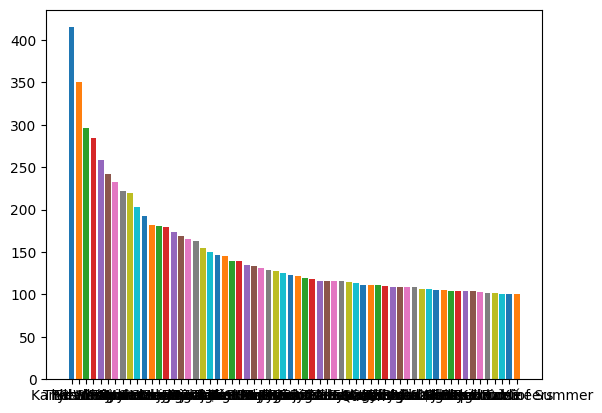

<Figure size 60000x5000 with 0 Axes>

In [319]:
for i in range(len(tmp2)):
    plt.bar(tmp2[i][0], tmp2[i][1])
plt.figure(figsize = (600,50))

In [320]:
songs = list()
for i in data['playlists']:
    for j in i['tracks']:
        songs.append(j['track_name'])

In [321]:
songs

['Lose Control (feat. Ciara & Fat Man Scoop)',
 'Toxic',
 'Crazy In Love',
 'Rock Your Body',
 "It Wasn't Me",
 'Yeah!',
 'My Boo',
 'Buttons',
 'Say My Name',
 'Hey Ya! - Radio Mix / Club Mix',
 'Promiscuous',
 'Right Where You Want Me - Radio Edit Version',
 'Beautiful Soul',
 "Leavin'",
 'Me & U',
 'Ice Box',
 'Sk8er Boi',
 'Run It!',
 'Check On It - feat. Bun B and Slim Thug',
 "Jumpin', Jumpin'",
 'Soak Up The Sun',
 'Where Is The Love?',
 "Stacy's Mom",
 'Just The Girl',
 'Yo (Excuse Me Miss)',
 'Year 3000',
 'Lip Gloss',
 'Everytime We Touch - Radio Edit',
 'Whatcha Say',
 'Miss Independent',
 'Party In The U.S.A.',
 'The Great Escape',
 'Replay',
 'Forever',
 'Your Love Is My Drug',
 'Closer',
 'One Less Lonely Girl',
 'Paper Planes',
 'Mr. Brightside',
 'All The Small Things',
 'Beep',
 'Somebody To Love',
 'Dirty Little Secret',
 'Baby',
 'A Thousand Miles',
 'Livin on Sunday',
 'See You Again',
 'How Do You Sleep? - Featuring Ludacris',
 'This Is Me',
 'My Happy Ending',
 'C

In [322]:
counted_songs = Counter(songs)
counted_songs

Counter({'Lose Control (feat. Ciara & Fat Man Scoop)': 6,
         'Toxic': 14,
         'Crazy In Love': 28,
         'Rock Your Body': 9,
         "It Wasn't Me": 25,
         'Yeah!': 34,
         'My Boo': 8,
         'Buttons': 8,
         'Say My Name': 26,
         'Hey Ya! - Radio Mix / Club Mix': 25,
         'Promiscuous': 13,
         'Right Where You Want Me - Radio Edit Version': 3,
         'Beautiful Soul': 12,
         "Leavin'": 4,
         'Me & U': 7,
         'Ice Box': 4,
         'Sk8er Boi': 11,
         'Run It!': 7,
         'Check On It - feat. Bun B and Slim Thug': 4,
         "Jumpin', Jumpin'": 6,
         'Soak Up The Sun': 2,
         'Where Is The Love?': 11,
         "Stacy's Mom": 19,
         'Just The Girl': 3,
         'Yo (Excuse Me Miss)': 5,
         'Year 3000': 11,
         'Lip Gloss': 8,
         'Everytime We Touch - Radio Edit': 8,
         'Whatcha Say': 16,
         'Miss Independent': 14,
         'Party In The U.S.A.': 29,
         'The

In [311]:
sorted_songs = counted_songs.most_common()
sorted_songs

[('Closer', 75),
 ('One Dance', 55),
 ('Ride', 52),
 ('HUMBLE.', 52),
 ('Broccoli (feat. Lil Yachty)', 50),
 ('Roses', 49),
 ('Home', 47),
 ('Congratulations', 47),
 ("Don't Let Me Down", 44),
 ('Forever', 43),
 ('Sorry', 42),
 ('Skinny Love', 41),
 ('iSpy (feat. Lil Yachty)', 39),
 ('Jumpman', 39),
 ('Bounce Back', 39),
 ('Mask Off', 38),
 ('Gold', 38),
 ('Let Me Love You', 38),
 ('Bad and Boujee (feat. Lil Uzi Vert)', 38),
 ('White Iverson', 38),
 ('XO TOUR Llif3', 37),
 ('Panda', 37),
 ('Selfish', 35),
 ('goosebumps', 35),
 ('Down', 35),
 ('Stronger', 35),
 ('Never Be Like You', 35),
 ('Caroline', 35),
 ('Gold Digger', 35),
 ('Yeah!', 34),
 ('Location', 34),
 ('No Role Modelz', 34),
 ('Stay', 33),
 ('T-Shirt', 33),
 ('Work from Home', 33),
 ('Mercy', 33),
 ('Trap Queen', 33),
 ('Waves', 33),
 ('Drive', 32),
 ('Ni**as In Paris', 32),
 ('Cheap Thrills', 32),
 ('Starboy', 32),
 ('Wagon Wheel', 32),
 ('Blessings', 32),
 ('Black Beatles', 32),
 ('Riptide', 31),
 ('September', 31),
 ('Say

In [312]:
tmp3 = list()
for i in range(len(sorted_songs)):
    if sorted_songs[i][1] >= 25:
        tmp3.append(sorted_songs[i])


In [313]:
tmp3

[('Closer', 75),
 ('One Dance', 55),
 ('Ride', 52),
 ('HUMBLE.', 52),
 ('Broccoli (feat. Lil Yachty)', 50),
 ('Roses', 49),
 ('Home', 47),
 ('Congratulations', 47),
 ("Don't Let Me Down", 44),
 ('Forever', 43),
 ('Sorry', 42),
 ('Skinny Love', 41),
 ('iSpy (feat. Lil Yachty)', 39),
 ('Jumpman', 39),
 ('Bounce Back', 39),
 ('Mask Off', 38),
 ('Gold', 38),
 ('Let Me Love You', 38),
 ('Bad and Boujee (feat. Lil Uzi Vert)', 38),
 ('White Iverson', 38),
 ('XO TOUR Llif3', 37),
 ('Panda', 37),
 ('Selfish', 35),
 ('goosebumps', 35),
 ('Down', 35),
 ('Stronger', 35),
 ('Never Be Like You', 35),
 ('Caroline', 35),
 ('Gold Digger', 35),
 ('Yeah!', 34),
 ('Location', 34),
 ('No Role Modelz', 34),
 ('Stay', 33),
 ('T-Shirt', 33),
 ('Work from Home', 33),
 ('Mercy', 33),
 ('Trap Queen', 33),
 ('Waves', 33),
 ('Drive', 32),
 ('Ni**as In Paris', 32),
 ('Cheap Thrills', 32),
 ('Starboy', 32),
 ('Wagon Wheel', 32),
 ('Blessings', 32),
 ('Black Beatles', 32),
 ('Riptide', 31),
 ('September', 31),
 ('Say

<Figure size 60000x5000 with 0 Axes>

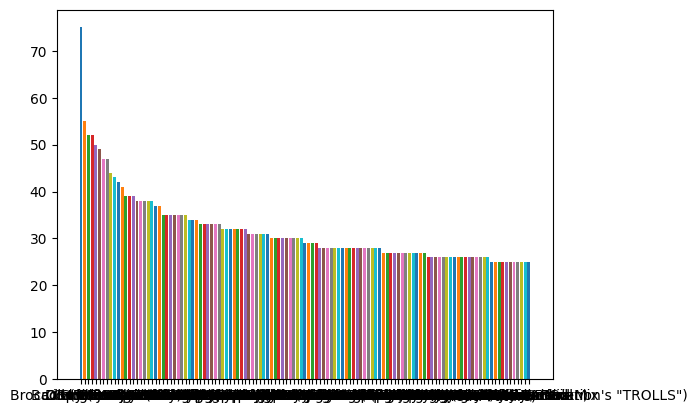

<Figure size 60000x5000 with 0 Axes>

In [316]:
for i in range(len(tmp3)):
    plt.bar(tmp3[i][0], tmp3[i][1])
plt.figure(figsize = (600,50))
    

# QUESTION 3


In [332]:
def dataframe(indicators, country):
    df = wb.data.DataFrame(indicators, country, columns='series')
    df.reset_index()  
    return df

In [333]:
indicators = list(['SI.POV.NAHC', 'SH.XPD.CHEX.PC.CD', 'SL.TLF.CACT.FE.NE.ZS', 'SH.DYN.MORT', 'SE.ADT.LITR.FE.ZS'])
dff = dataframe(indicators, 'TUR')

In [334]:
dff

,SE.ADT.LITR.FE.ZS,SH.DYN.MORT,SH.XPD.CHEX.PC.CD,SI.POV.NAHC,SL.TLF.CACT.FE.NE.ZS
time,,,,,
YR1960,NaN,257.0,NaN,NaN,65.440002
YR1961,NaN,249.3,NaN,NaN,NaN
YR1962,NaN,241.4,NaN,NaN,NaN
YR1963,NaN,233.5,NaN,NaN,NaN
YR1964,NaN,225.7,NaN,NaN,NaN
...,...,...,...,...,...
YR2017,93.498268,11.4,442.617615,13.9,33.529999
YR2018,NaN,10.7,389.865570,14.4,34.119999
YR2019,94.424042,10.1,396.466827,15.0,34.310001


In [335]:
def plotting(df, indicator):
    df_new = df.dropna()
    plt.plot(df_new.index, df_new[indicator])
    plt.tight_layout()
    plt.ylabel('Years')

Text(0.5, 1.0, 'Poverty headcount ratio at national poverty lines')

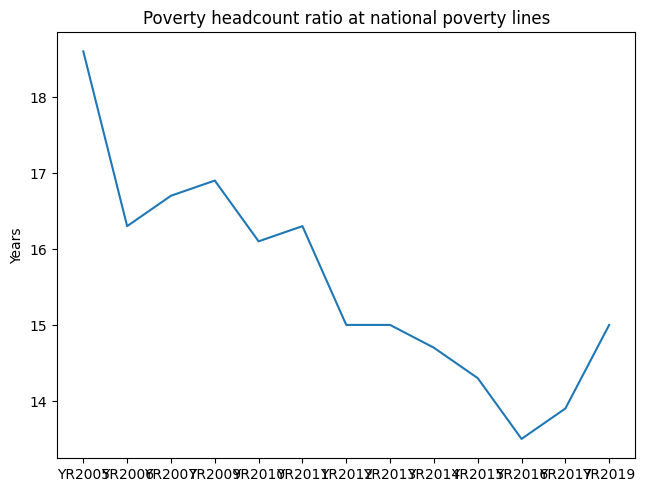

In [336]:
plotting(dff, indicators[0])
plt.title('Poverty headcount ratio at national poverty lines')

Text(0.5, 1.0, 'Current health expenditure per capita')

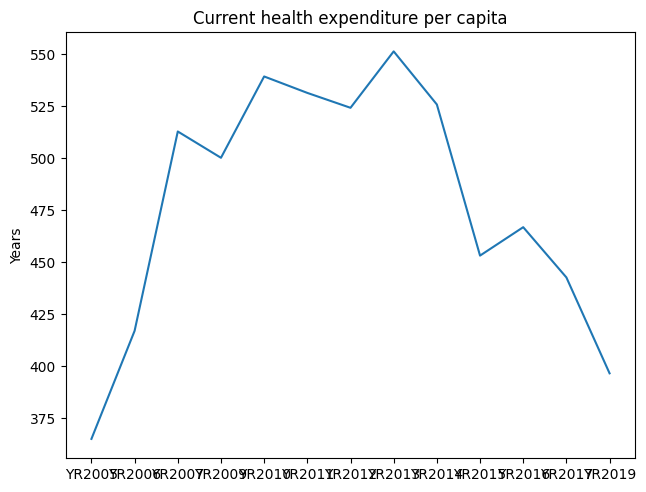

In [337]:
plotting(dff, indicators[1])
plt.title('Current health expenditure per capita')

Text(0.5, 1.0, 'Labor force participation rate, female (% of females ages 15 and above)')

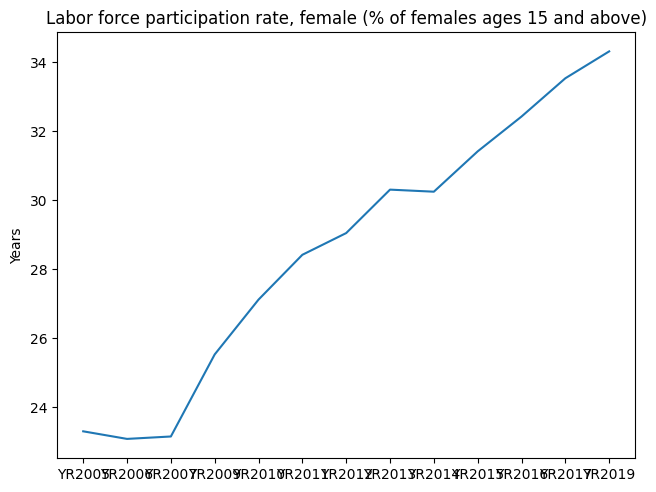

In [338]:
plotting(dff, indicators[2])
plt.title('Labor force participation rate, female (% of females ages 15 and above)')

Text(0.5, 1.0, 'Mortality rate under-5 (per 1,000 live births)')

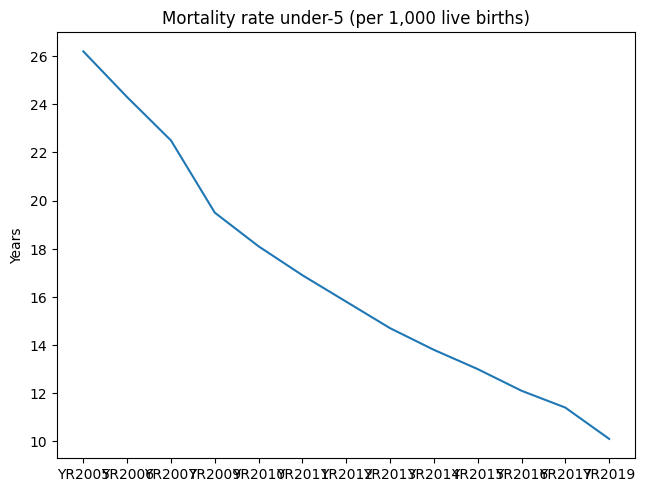

In [339]:
plotting(dff, indicators[3])
plt.title('Mortality rate under-5 (per 1,000 live births)')

Text(0.5, 1.0, 'Literacy rate, adult family (% of females age 15 and above)')

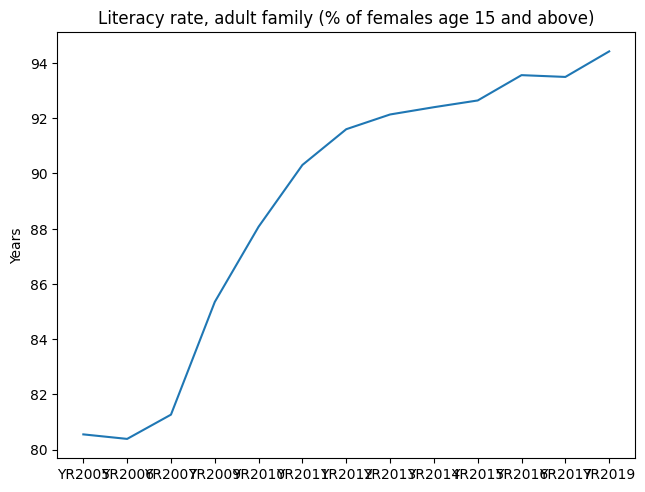

In [340]:
plotting(dff, indicators[4])
plt.title('Literacy rate, adult family (% of females age 15 and above)')

In [341]:
def scatterPlot(df, id1, id2):
    df.dropna()
    plt.scatter(df[id1], df[id2], c = 'blue', alpha = 0.5)
    

Text(0, 0.5, 'Current health expenditure per capita')

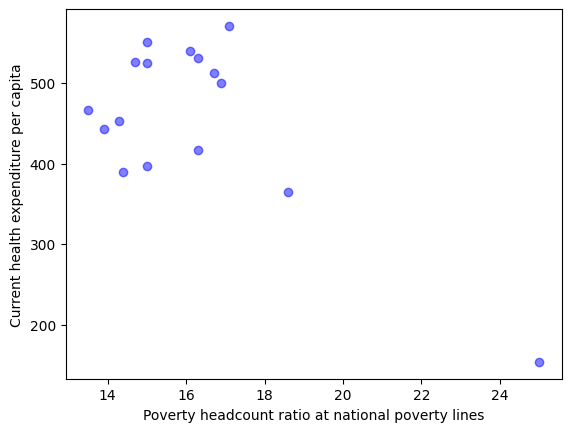

In [342]:
scatterPlot(dff, indicators[0], indicators[1])
plt.xlabel('Poverty headcount ratio at national poverty lines')
plt.ylabel('Current health expenditure per capita')

Text(0, 0.5, 'Labor force participation rate, female (% of female population ages 15+)')

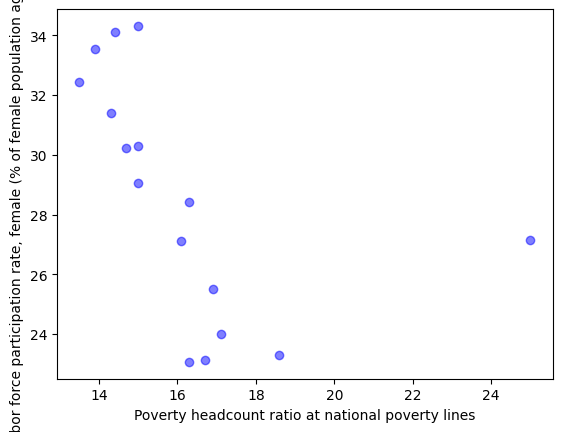

In [343]:
scatterPlot(dff, indicators[0], indicators[2])
plt.xlabel('Poverty headcount ratio at national poverty lines')
plt.ylabel('Labor force participation rate, female (% of female population ages 15+)')

Text(0, 0.5, 'Mortality rate, under-5 (per 1,000 live births)')

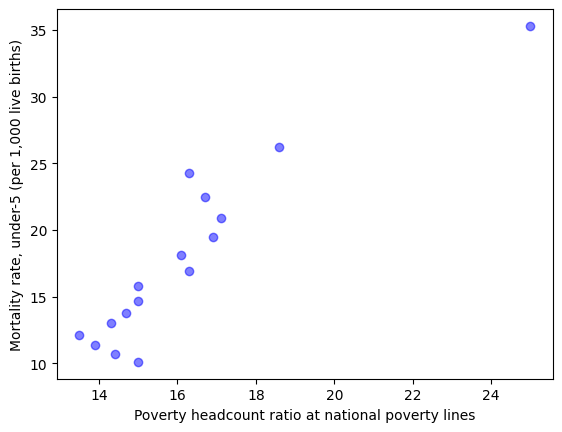

In [344]:
scatterPlot(dff, indicators[0], indicators[3])
plt.xlabel('Poverty headcount ratio at national poverty lines')
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')

Text(0, 0.5, 'Literacy rate, adult female (% of females ages 15 and above)')

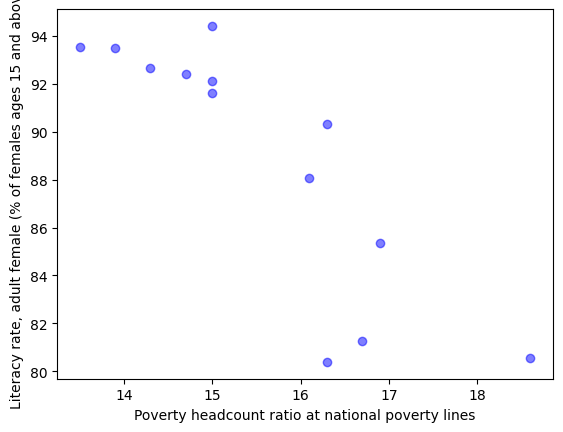

In [345]:
scatterPlot(dff, indicators[0], indicators[4])
plt.xlabel('Poverty headcount ratio at national poverty lines')
plt.ylabel('Literacy rate, adult female (% of females ages 15 and above)')

Text(0, 0.5, 'Labor force participation rate, female (% of female population ages 15+)')

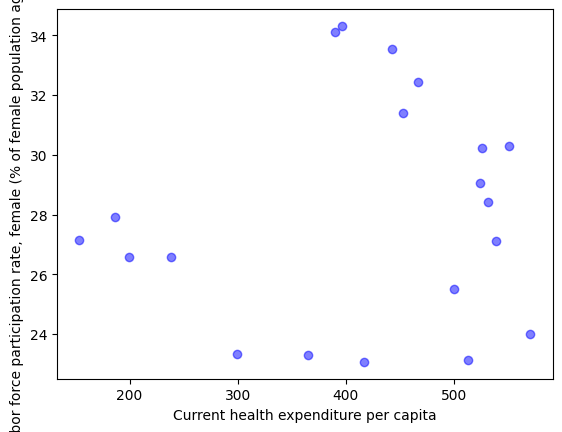

In [346]:
scatterPlot(dff, indicators[1], indicators[2])
plt.xlabel('Current health expenditure per capita')
plt.ylabel('Labor force participation rate, female (% of female population ages 15+)')

Text(0, 0.5, 'Mortality rate, under-5 (per 1,000 live births)')

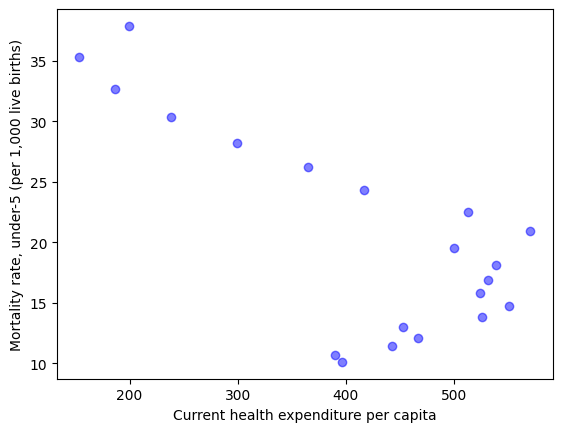

In [347]:
scatterPlot(dff, indicators[1], indicators[3])
plt.xlabel('Current health expenditure per capita')
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')

Text(0, 0.5, 'Literacy rate, adult female (% of females ages 15 and above)')

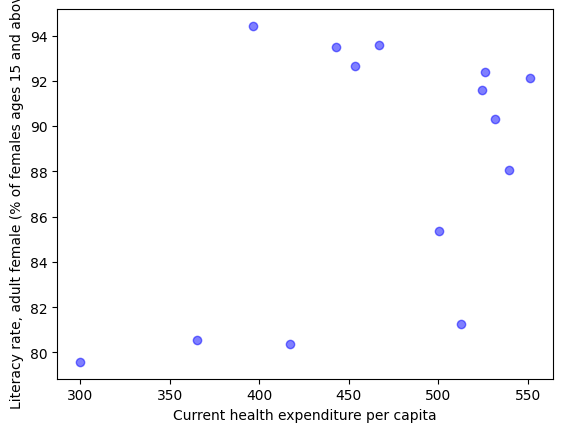

In [348]:
scatterPlot(dff, indicators[1], indicators[4])
plt.xlabel('Current health expenditure per capita')
plt.ylabel('Literacy rate, adult female (% of females ages 15 and above)')

Text(0, 0.5, 'Mortality rate, under-5 (per 1,000 live births)')

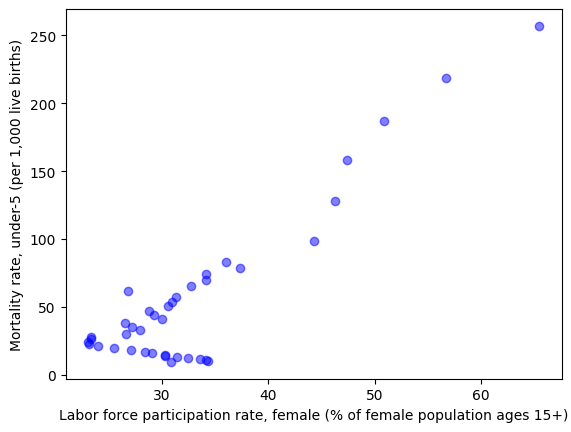

In [349]:
scatterPlot(dff, indicators[2], indicators[3])
plt.xlabel('Labor force participation rate, female (% of female population ages 15+)')
plt.ylabel('Mortality rate, under-5 (per 1,000 live births)')

Text(0, 0.5, 'Literacy rate, adult female (% of females ages 15 and above)')

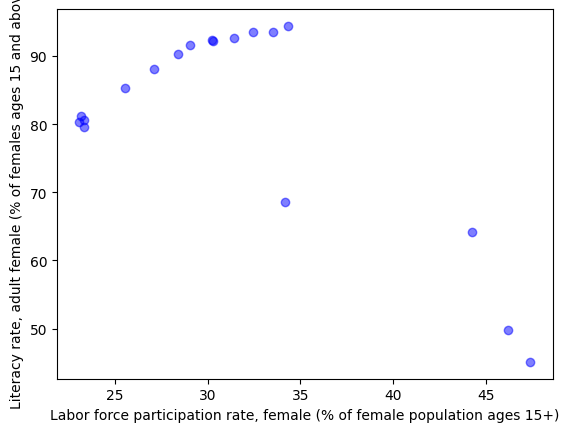

In [350]:
scatterPlot(dff, indicators[2], indicators[4])
plt.xlabel('Labor force participation rate, female (% of female population ages 15+)')
plt.ylabel('Literacy rate, adult female (% of females ages 15 and above)')

Text(0, 0.5, 'Literacy rate, adult female (% of females ages 15 and above)')

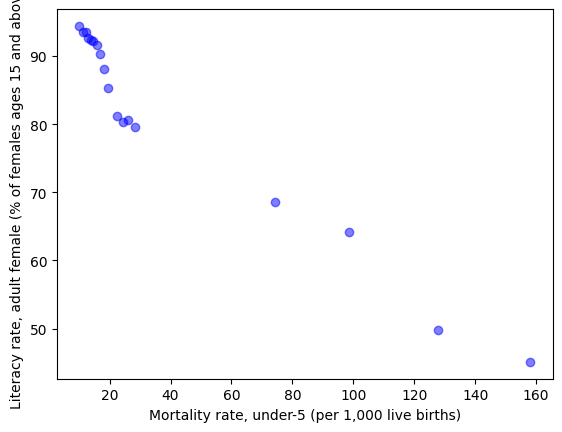

In [351]:
scatterPlot(dff, indicators[3], indicators[4])
plt.xlabel('Mortality rate, under-5 (per 1,000 live births)')
plt.ylabel('Literacy rate, adult female (% of females ages 15 and above)')